In [ ]:
import numpy as np
import time
import sklearn.linear_model as lm
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [ ]:
data = np.loadtxt('/content/train.dat').astype(np.int64)

In [ ]:
y = data[:,data.shape[1]-1]
X = data[:,:data.shape[1]-1]
print(f"y.shape {y.shape}")
print(f"X.shape {X.shape}")

y.shape (40000,)
X.shape (40000, 32)


In [ ]:
def feature_map_method1(X):
    X = 1-2*X
    D = X.shape[1]
    for i in range(1,D):
        X[:,D-i-1] = X[:,D-i-1] * X[:,D-i]

    n_samples, n_features = X.shape
    outer_product = np.einsum('ij,ik->ijk', X, X)
    upper_triangle_indices = np.triu_indices(n_features,k=1)
    features = outer_product[:, upper_triangle_indices[0], upper_triangle_indices[1]]

    result = np.concatenate((X,features),axis=1)

    return result

def feature_map_method2(X):
    X = 1-2*X
    X_rev = X[:,::-1]
    X_prod = np.cumprod(X_rev,axis=1)
    X = X_prod[:,::-1]

    n_samples, n_features = X.shape
    outer_product = np.einsum('ij,ik->ijk', X, X)
    upper_triangle_indices = np.triu_indices(n_features,k=1)
    features = outer_product[:, upper_triangle_indices[0], upper_triangle_indices[1]]

    result = np.concatenate((X,features),axis=1)

    return result

In [ ]:
X = data[:,:data.shape[1]-1]
start = time.time()
X = feature_map_method1(X)
end = time.time()
print(f"Time for execution:{end-start}")
print(X.shape)

Time for execution:0.8987579345703125
(40000, 528)


In [ ]:
def add_column_of_ones(matrix):
    # Check if the input is a NumPy array
    if not isinstance(matrix, np.ndarray):
        raise ValueError("Input must be a NumPy array")

    # Get the number of rows in the matrix
    num_rows = matrix.shape[0]

    # Create a column vector of ones
    ones_column = np.ones((num_rows, 1))

    # Concatenate the matrix and the column of ones along the second axis (axis=1)
    matrix_with_ones = np.concatenate((matrix, ones_column), axis=1)

    return matrix_with_ones

In [ ]:
X = add_column_of_ones(X)

Logistic Regression


In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.15)
model = lm.LogisticRegression(penalty='l2',tol=1e-4, fit_intercept= False)
model.fit(X_train,y_train)

LogisticRegression(fit_intercept=False)

In [ ]:
y_pred = model.predict(X_train)
print(f"train accuracy - Score {accuracy_score(y_pred,y_train)}")
print(f"train MAE {mean_absolute_error(y_pred,y_train)}")

y_pred = model.predict(X_val)

print(f"Val accuracy - Score {accuracy_score(y_pred,y_val)}")
print(f"Val MAE {mean_absolute_error(y_pred,y_val)}")

train accuracy - Score 0.9964411764705883
train MAE 0.003558823529411765
Val accuracy - Score 0.992
Val MAE 0.008


In [ ]:
data1 = np.loadtxt('/content/test.dat').astype(np.int64)

In [ ]:
y1 = data[:,data.shape[1]-1]
X1 = data[:,:data.shape[1]-1]
print(f"y.shape {y.shape}")
print(f"X.shape {X.shape}")

y.shape (40000,)
X.shape (40000, 529)


LINEAR SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error

# Initialize empty lists to store accuracy and mean absolute error values
accuracies = []
maes = []
C_values = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1, 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]

# Loop through different C values
for C_value in C_values:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    for tol_value in [1e-2, 1e-4, 1e-6, 1e-8]:
        for loss_type in ['hinge', 'squared_hinge']:
            # Create and train LinearSVC model
            model = svm.LinearSVC(C=C_value, tol=tol_value, penalty='l2', loss=loss_type)
            model.fit(X_train, y_train)

            # Predict labels for validation data
            y_pred = model.predict(X_val)

            # Calculate accuracy and mean absolute error
            accuracy = accuracy_score(y_val, y_pred)
            mae = mean_absolute_error(y_val, y_pred)

            # Append accuracy and mean absolute error values to lists
            accuracies.append((C_value, tol_value, loss_type, accuracy))
            maes.append((C_value, tol_value, loss_type, mae))

# Convert lists to numpy arrays for plotting
accuracies = np.array(accuracies)
maes = np.array(maes)




In [ ]:
accuracies

In [ ]:
copy=accuracies

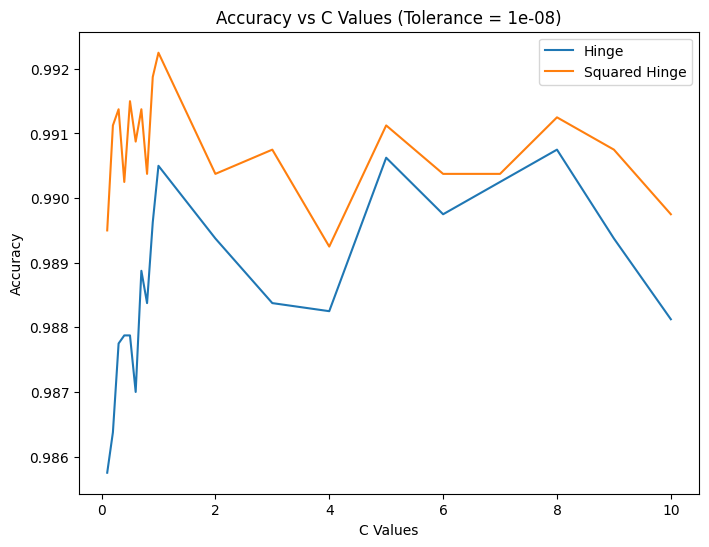

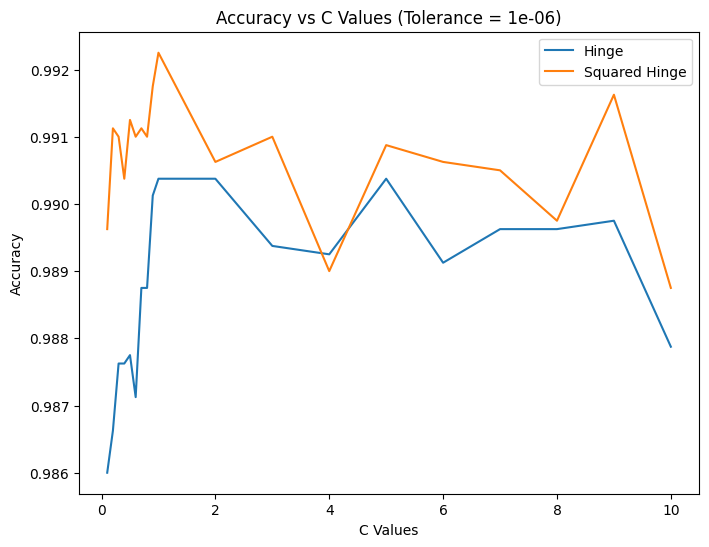

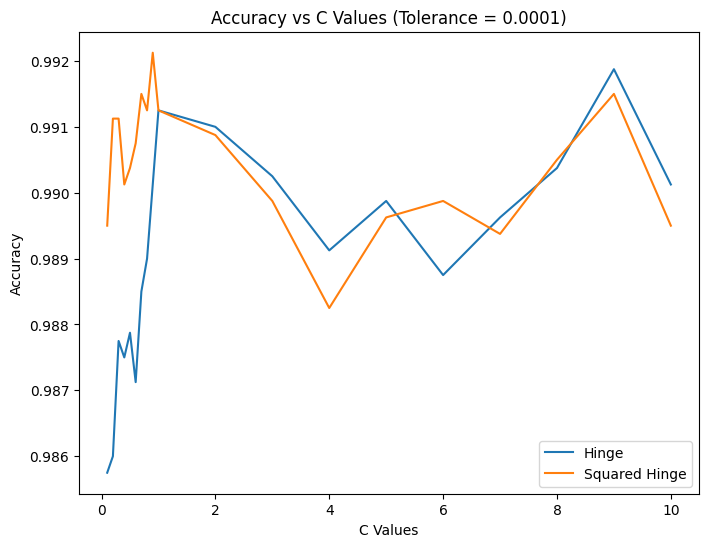

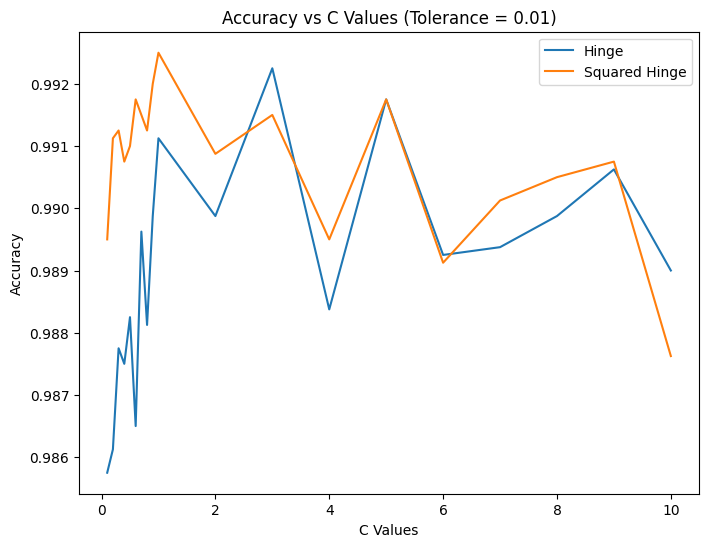

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



tolerances = sorted(set(float(acc[1]) for acc in accuracies))

for tol_value in tolerances:
    # Filter accuracies for the current tolerance value and for each loss type
    tol_accuracies_hinge = [acc for acc in accuracies if float(acc[1]) == tol_value and acc[2] == 'hinge']
    tol_accuracies_squared_hinge = [acc for acc in accuracies if float(acc[1]) == tol_value and acc[2] == 'squared_hinge']

    # Extract C values and accuracies for both loss types
    c_values_hinge = [float(acc[0]) for acc in tol_accuracies_hinge]
    accuracies_hinge = [float(acc[3]) for acc in tol_accuracies_hinge]

    c_values_squared_hinge = [float(acc[0]) for acc in tol_accuracies_squared_hinge]
    accuracies_squared_hinge = [float(acc[3]) for acc in tol_accuracies_squared_hinge]

    # Plot accuracies for both loss types
    plt.figure(figsize=(8, 6))
    plt.plot(c_values_hinge, accuracies_hinge, label='Hinge')
    plt.plot(c_values_squared_hinge, accuracies_squared_hinge, label='Squared Hinge')
    plt.xlabel('C Values')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs C Values (Tolerance = {tol_value})')
    plt.legend()
    plt.show()


In [ ]:
max_accuracy = accuracies[0]
for point in accuracies:
  if point[3] > max_accuracy[3] :
    max_accuracy = point
print(max_accuracy)

['1' '0.01' 'squared_hinge' '0.9925']


In [ ]:
import numpy as np
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tol_accuracies = {}
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
for tol in tolerances:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    # Create and train LinearSVC model
    begin = time.time()
    model = svm.LinearSVC(C=1, tol=tol, loss='squared_hinge')
    end = time.time()
    model.fit(X_train, y_train)

    # Predict labels for validation data
    y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Store accuracy and time in the dictionary
    tol_accuracies[tol] = (accuracy, end - begin)
    print(accuracy, end - begin)

tol_accuracies = np.array(list(tol_accuracies.values()))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.99075 3.24249267578125e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.990125 3.4809112548828125e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9895 3.2901763916015625e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9885 2.6941299438476562e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.991375 3.0040740966796875e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.99075 3.361701965332031e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.99125 2.5987625122070312e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.99025 3.170967102050781e-05
0.99225 2.4318695068359375e-05


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
tol_accuracies

array([[9.90750000e-01, 3.24249268e-05],
       [9.90125000e-01, 3.48091125e-05],
       [9.89500000e-01, 3.29017639e-05],
       [9.88500000e-01, 2.69412994e-05],
       [9.91375000e-01, 3.00407410e-05],
       [9.90750000e-01, 3.36170197e-05],
       [9.91250000e-01, 2.59876251e-05],
       [9.90250000e-01, 3.17096710e-05],
       [9.92250000e-01, 2.43186951e-05]])

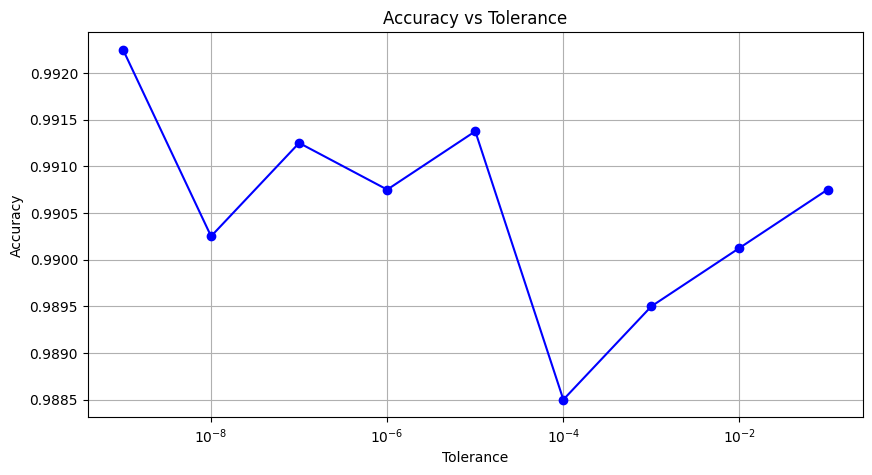

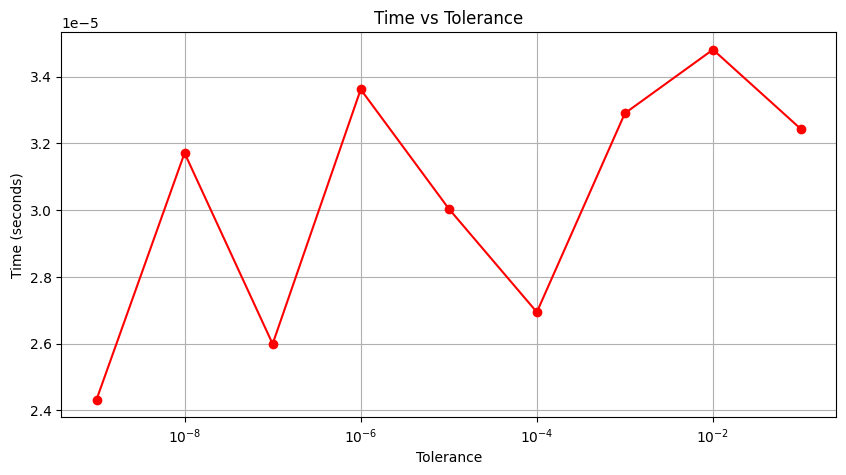

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tolerance values
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

# Extract accuracy and time data
accuracies = tol_accuracies[:, 0]
times = tol_accuracies[:, 1]

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(tolerances, accuracies, marker='o', color='b')
plt.title('Accuracy vs Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()

# Plotting time
plt.figure(figsize=(10, 5))
plt.plot(tolerances, times, marker='o', color='r')
plt.title('Time vs Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Time (seconds)')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()
